# Linear Quadratic Regulator

### Import

In [2]:
# Linear Quadratic Regulator (LQR) Example
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import signal
from scipy.linalg import solve_continuous_are

## Plant definition: Inverted Pendulum

In [3]:
# Define system matrices (linearized inverted pendulum)
A = np.array([[0, 1, 0, 0],
              [0, 0, -0.1818, 0],
              [0, 0, 0, 1],
              [0, 0, 2.6727, 0]])

B = np.array([[0],
              [1.8182],
              [0],
              [-2.7273]])

# LQR Cost matrices
Q = np.diag([10, 1, 100, 1])  # Heavily penalize position and angle
R = np.array([[0.01]])        # Penalize large control effort

## LQR

In [6]:
# Solve Continuous-time Algebraic Riccati Equation (ARE)
P = solve_continuous_are(A, B, Q, R)

# Compute LQR gain K
K = np.linalg.inv(R) @ B.T @ P

print("LQR Gain K:\n", K)

# Closed-loop system
A_cl = A - B @ K

# Simulate system
dt = 0.01
t = np.arange(0, 30, dt)
x0 = np.array([0.1, 0, np.pi/6, 0])  # Small cart position, angle ~30°

sys_cl = signal.StateSpace(A_cl, np.zeros((4, 1)), np.eye(4), np.zeros((4, 1)))
t_out, y_out, x_out = signal.lsim(sys_cl, U=0*t, T=t, X0=x0)

LQR Gain K:
 [[ -31.6227766   -75.22916156 -141.6235883   -65.41189736]]


### Plot Results

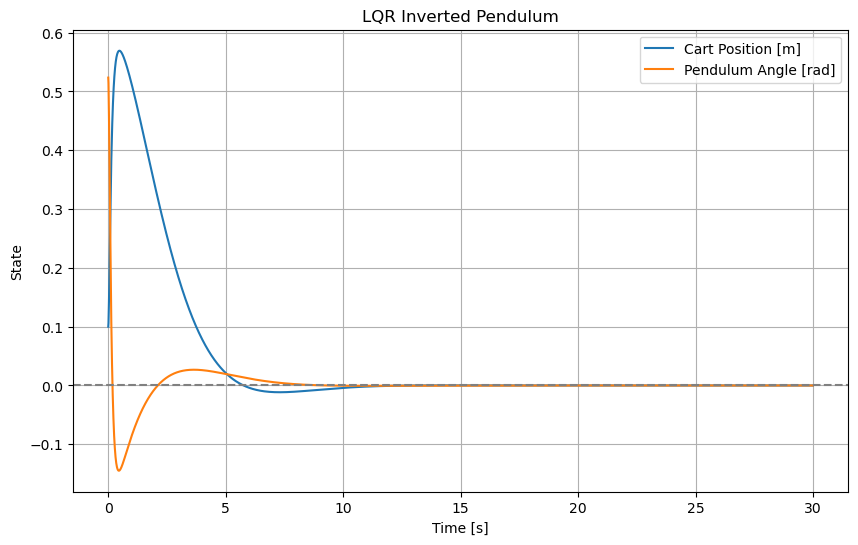

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t_out, x_out[:, 0], label='Cart Position [m]')
plt.plot(t_out, x_out[:, 2], label='Pendulum Angle [rad]')
plt.axhline(0, color='gray', linestyle='--')
plt.title('LQR Inverted Pendulum')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()